# Survival Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import EpiClockInvasiveBRCA.src.util as epi_util
from EpiClockInvasiveBRCA.src.consts import consts as epi_consts
import survival

In [2]:
TCGA_clinical_dir = os.path.join(epi_consts['official_indir'], 'TCGA')
clinical = pd.read_table(os.path.join(TCGA_clinical_dir, 'cohort1.clinical.annotated.tsv'), index_col=0)

In [22]:
event_type = 'DSS'

In [23]:
survival_data = pd.read_table(os.path.join(TCGA_clinical_dir, 'survival_BRCA_survival.txt')).drop('sample', axis=1)
survival_data.drop_duplicates(inplace=True)
survival_data = survival_data.merge(clinical[['in_analysis_dataset', 'c_beta']], left_on='_PATIENT', right_index=True)
survival_data = survival_data.loc[survival_data['in_analysis_dataset'], ['_PATIENT', event_type, f'{event_type}.time', 'c_beta']].dropna()
print(f'{survival_data.shape[0]} samples available')

392 samples available


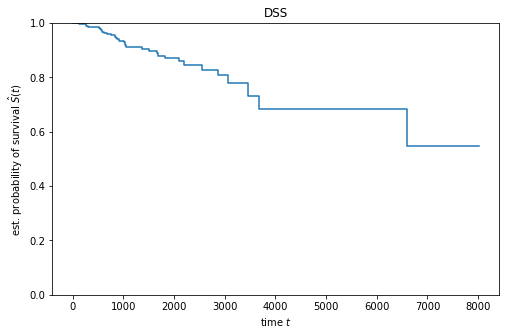

In [24]:
survival_x = survival_data['c_beta'].values.reshape([-1, 1])
survival_y = survival.DFtoStrucArray(survival_data, event_type, f'{event_type}.time')
survival.plotKaplanSurvivalProbsOverTime(survival_y, event_type, f'{event_type}.time')

In [25]:
train_score_list = []
test_score_list = []

n_iters = 100
n_iters_mean = n_iters
print(f'Using {event_type}\n')
print(f'Splitting data and training model {n_iters} times...')
for i in range(n_iters):
    survival_x_train, survival_x_test, survival_y_train, survival_y_test = train_test_split(survival_x, survival_y,
                                                                                            test_size=0.2)

    #with warnings.catch_warnings():
    #    warnings.simplefilter("ignore")
    estimator = survival.getTrainedEstimator(survival_x_train, survival_y_train)
    train_score_list.append(estimator.score(survival_x_train, survival_y_train))
    test_score_list.append(estimator.score(survival_x_test, survival_y_test))
    
print(f'Average ROC AUC on training data: {np.mean(train_score_list):.3f}')
print(f'Average ROC AUC on test data: {np.mean(test_score_list):.3f}')

Using DSS

Splitting data and training model 100 times...
Average ROC AUC on training data: 0.484
Average ROC AUC on test data: 0.494
